<a href="https://colab.research.google.com/github/Max-JI64/Today-I-Learn/blob/main/Study/Image_Processing_Bible/2_1_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%9E%80%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1.1 디지털 이미지의 구조

## 픽셀  
pixel = picture + elemnet  
모니터 화면의 가장 작은 요소, 디지털 이미지는 픽셀의 모자이크

## 해상도  
이미지가 보유하고 있는 픽셀의 양  
1920 x 1080 : 1920픽셀 너비, 1080픽셀 높이  

카메라의 센서 사이즈와 스캐너의 정밀도에 의해 해상도가 결정

## 픽셀 밀도  
픽셀이 디스플레이에 얼마나 촘촘하게 배열되어 있는지  
PPI : Pixel Per Inch  

픽셀 밀도가 높을수록 더 부드러워짐  
에너지의 효율성과 밝기에도 영향을 줌


## 서브 픽셀  
픽셀을 구성하는 작은 컬러 요소  
RGBW : RGB + 흰색 서브 필터, RGB 서브 픽셀을 전부 활성화 하지 않고도 흰색 표현 가능 -> 에너지 절약

## 이미지 압축  
압축된 이미지는 모델 훈련 시 I/O 오버헤드를 줄여줌 -> 프로세스 속도 증가  
전송 시간 감소  
컴퓨터 비전 모델 성능 향상 <- 압축으로 인한 미세한 왜곡은 일종의 데이터 증강으로 작용  

### 무손실 압축  
#### PNG  
Portable Network Graphics  
이미지 무결성, 무손실 압축
- 비트 심도 : 1비트(이진 이미지) ~ 16비트(광범위한 색상 또는 그레이 스케일)
- 색상 유형 : 그레이 스케일, RGB, 인덱스 컬러 등 -> 간단한 아이콘이나 고품질 사진 등
- 투명도 : 알파 채널 투명도 지원
- 디플레이트 알고리즘 : LZ77로 데이터의 반복 시퀸스 효율적 축조, 허프만 코딩으로 빈도가 높은 패턴을 짧은 코드로 변환 -> 압축률 극대화

### 손실 압출  
기각의 한계로 인지하기 어려운 특정 데이터를 제거 -> 무손실보다 높은 압축률
#### JPEG
정지 이밎(사진) 압축 특화 - 선과 글자처럼 가장자리가 날카롭고 대비가 있는 이미지에는 아티팩트가 생성되기에 적합하지 않다  
이미지를 편집하여 JPEG로 저장할 때마다 손실 압축이 다시 적용되어 품질 저하  
따라서 전처리 및 모델링 과정에선 PNG로 작업 후 배포엔 JPEG로 저장  
- 서브 샘플링 : RGB가 YCbCr 색상 공간으로 변환  
Y : 휘도(밝기), Cb와 Cr : 색차(색상)
사람의 시각은 색상보다 빛에 더 민감 -> 눈에 띄는 이미지 품질의 손실 없이 색상 압축 가능
- 양자화 : 복잡하고 어려운 픽셀의 패턴은 시각으로 확인 어려우니깐 단순화, 디테일을 얼마나 유지하거나 제거할지 선택
- 엔트로피 코딩 : 허프만 코딩과 같은 방법으로 세부 정보 효율적 저장

# 2.1.2 색 공간 이해하기

## 그레이 스케일
복잡한 스펙트럼 분포보다 빛의 강도에 초점  
색상 구별보다 명암과 구조적 세부사항을 강조  
픽셀 값 : 0은 빛이 없는 상태(검은색), 255는 최대 밝기(흰색)  
이러한 단순성으로 저장 공간을 줄이고 처리 속도 높임  
가장자리 감지나 텍스처 분석과 같은 이미지 처리 작업에서 강점

## RGB
Red, Green, Blue 빛의 삼원색  
세가지 생상은 각각 채널이라는 이름으로 표현  
채널은 각 색상의 정보를 독립적으로 담고있음

## CMYK
색의 삼원색, 인쇄에 사용  
빛을 빼는 원리로 작동
완벽한 검은색이 나오지 않으므로 키(검정 잉크)가 포함

## HSV
안산이 색을 묘사하는 방식과 일치하도록 설계 (빨간색의 불같은 느낌, 파란색의 차분함 등 특정 음영이나 색조)  
특정 색상을 추출하거나 배경과 전경을 좀 더 직관적으로 구분 가능  
- Hue(색조) : 우리가 보고 있는 색의 유형 또는 품질  
빨강, 파랑, 초록과 같은 색의 기본 본질
- Saturation(채도) : 색조의 강도 또는 설명도  
채도가 높으면 풍부하고 충만한 색, 낮으면 색이 바래거나 흐릿해 보임
- Value(값, 밝기) : 색상의 밝기 또는 어두움

## 비트

### 디지털 이미지의 비트 심도
이미지의 각 픽셀에 대한 컬로 또는 그레이 스케일 정보를 표현
- 1비트 : 두가지 값, 그레이 스케일에서 회색 음영이 없는 흑백 이미지
- 8비트 : 0(검정)부터 255(흰색), 부드러운 그라데이션과 그레이 스케일 스펙트럼을 세밀하게 표현
- 16비트 : 0부터 65,535까지 표현, 더욱 부드러운 색으로 의료 영상과 같이 미묘한 음영 차이가 중요한 전문 환경
- 24비트(채널당 8비트) : 트루 컬러 - 방대한 색상 표현
- 48비트(채널당 16비트) : 디지털 아트 및 고화질 사진 등 전문 애플리케이션

### 비트 심도의 중요성
- 이미지 품질 : 비트 심도가 높을수록 그라데이션이 부드러워져 밴딩 아티팩트가 줄어든다
- 파일 사이즈 : 비트 심도가 높을수록 픽셀당 더 많은 데이터를 저장하여 파일 사이즈가 커진다
- 편집의 유연성 : 비트 심도가 높을수록 이미지 품질 저하 없이 편집할 수 있는 공간이 넓어진다
- 특수 이미징 : 천체 사진, 의료 영상 등에선 디테일 손실 없이 필요한 모든 데이터를 캡쳐하기 위해 특정 비트 심도가 필요하다

# 2.1.3 이미지에서의 텐서 이해하기
텐서는 벡터와 행렬을 더 높은 차원으로 일반화하는 다차원 배열

## 텐서의 이미지 표현
이미지는 픽셀 값의 배열로 자연스럽게 표현  
그레이 스케일 이미지는 2차우너 배열, 텐서의 원소들의 각 값은 픽셀 강도  
RGB 컬러 이미지는 3차원 배열 - 이미지의 높이, 너비 및 색상 채널
- 256x256 그레이 스케일 이미지 : (256, 256)
- 256x256 RGB 컬러 이미지 : (256, 256, 3)
- 100개 이미지 배치 : (100, 256, 256, 3)

## 이미지 다운로드 및 불러오기

In [ ]:
url = 'https://cobslab.com/wp-content/uploads/2022/02/ai-009-1.jpg'

import tensorflow as tf
image_path = tf.keras.utils.get_file('image.jpg', origin=url, cache_dir='/content/') #image.jpg로 이미지 다운로드

image = tf.io.read_file(image_path) #이미지 파일 내용 읽어오기, 원시 바이너리 문자열로 저장

#원시 바이너리 분자열을 숫자 텐서로 디코딩
image = tf.image.decode_jpeg(image, channels=3) #channels로 RGB 형식 지정
image

116520/116520 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step


<tf.Tensor: shape=(952, 1048, 3), dtype=uint8, numpy=
array([[[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       ...,

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]]], dtype=uint8)>

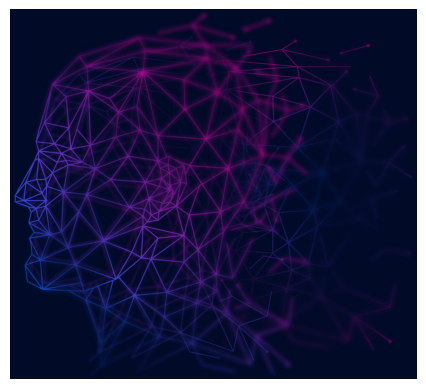

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()

## 다양한 색 공간으로 작업하기

### `tf.random.uniform`
랜덤한 값을 가진 텐서 생성 - 알고리즘 성능 평가, 색상 패턴 실험

In [ ]:
rgb_image = tf.random.uniform([100, 100, 3], maxval=255, dtype=tf.float32)
print(rgb_image)

tf.Tensor(
[[[167.15242   203.6297     59.972122 ]
  [234.06987    42.244522  143.67384  ]
  [ 13.71623   205.63469    64.722626 ]
  ...
  [242.22052   184.27357   155.68166  ]
  [150.86136    23.757086  101.76209  ]
  [ 97.6095    200.51053    95.448845 ]]

 [[ 35.173042   93.97732     9.5857   ]
  [182.0554    247.59578   187.90724  ]
  [232.97784   232.95717   108.90192  ]
  ...
  [ 89.77967   124.467674  186.11601  ]
  [ 32.484547   11.31178    59.013355 ]
  [130.73338   159.34299   186.74265  ]]

 [[ 25.20116   146.98703   245.64058  ]
  [  7.8753357 102.90711    31.298494 ]
  [200.98845   181.18167   173.12503  ]
  ...
  [241.78273   164.26506    11.493866 ]
  [213.48187   118.85604    98.70435  ]
  [181.94606   223.05864    40.743725 ]]

 ...

 [[190.69879   173.72537   243.50932  ]
  [245.58978    18.958185  153.31396  ]
  [142.88693   107.309525  178.26218  ]
  ...
  [  6.739774   42.872128  155.73303  ]
  [  3.6136365 137.46893   234.9542   ]
  [238.77779    58.872154  151.36

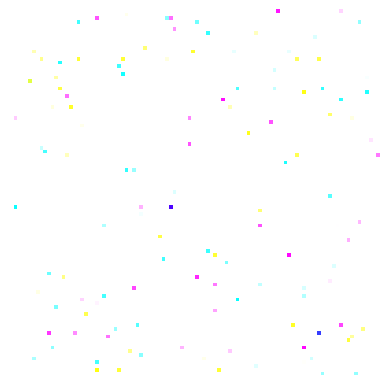

In [ ]:
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

### `tf.image.rgb_to_grayscale`
RGB 이미지를 그레이 스케일로 변경

(100, 100, 1)


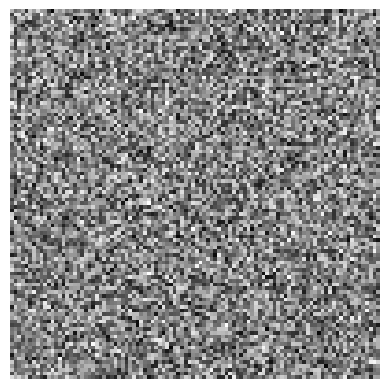

In [ ]:
grayscale_image = tf.image.rgb_to_grayscale(rgb_image)

print(grayscale_image.shape)
plt.imshow(grayscale_image.numpy().squeeze(), cmap='gray') #squeeze로 1차원 항목 제거 (높이, 너비만 사용)
plt.axis('off')
plt.show()

그레이 스케일 변경 공식  
grayscale = R x 0.299 + G x 0.587 + B x 0.114

In [ ]:
R = rgb_image[0][0][0]*0.299
G = rgb_image[0][0][1]*0.587
B = rgb_image[0][0][2]*0.114
Y=R+G+B
print(grayscale_image[0][0])
print(Y)

tf.Tensor([176.32932], shape=(1,), dtype=float32)
tf.Tensor(176.34604, shape=(), dtype=float32)


### `tf.image.rgb_to_hsv`
RGB 이미지를 HSV로 변환  

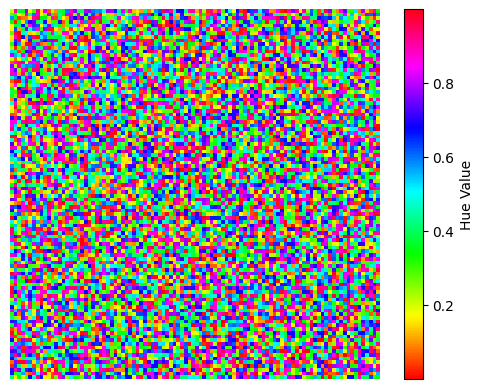

In [ ]:
# 0번째 채널인 색조 채널만 추출 후 시각화
hsv_image = tf.image.rgb_to_hsv(rgb_image)
hue_channel = hsv_image[:,:,0] #색조

plt.imshow(hue_channel, cmap='hsv')
plt.axis('off')
plt.colorbar(label='Hue Value')
plt.show()

## 픽셀 값의 정규화와 표준화
픽셀 값의 사이즈의 조정 방식은 모델의 성능과 수렴 속도에 많은 영향을 줌

### 정규화
픽셀 값의 범위를 [0,1]로 스케일링  
8비트 이미지의 경우 각 픽셀을 255로 나누기만 하면 됨 (텐서 모양에 자동으로 브로드캐스트 적용됨)

In [ ]:
normalized_image = rgb_image/255
rgb_image[0][0], normalized_image[0][0]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([167.15242 , 203.6297  ,  59.972122], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6554997 , 0.79854786, 0.23518479], dtype=float32)>)

### 표준화
픽셀 값을 평균 0, 표준 편차 1이 되도록 스케일링  
최적화 환경을 좀더 균일하게 만들ㅇ어 학습 과정을 가속화

In [ ]:
mean = tf.reduce_mean(rgb_image)
std = tf.math.reduce_std(rgb_image)

standardized_image = (rgb_image - mean)/std
rgb_image[0][0], standardized_image[0][0]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([167.15242 , 203.6297  ,  59.972122], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.5426206 ,  1.0384089 , -0.91414195], dtype=float32)>)